# LSTM 모델과 LSTM 사용을 위해 전처리된 데이터를 각각 로드하여 예측 테스트
- LSTM 모델은 /modeling/lstm/lstm_model.keras로 저장
- LSTM에 사용할 데이터는 data/lstm_data(lstm_X_data, lstm_y_data)로 저장

# 1. 데이터 로드

In [7]:
import pandas as pd

data = pd.read_csv('DBdata2410161600.csv', index_col=0)

# 2.데이터 분할

In [8]:
import pickle

In [9]:
input_data =  data[["Weekly Views", "n_score", "g_score", "Rank_lag_1", "Rank_lag_2", "Rank_lag_3"]]

with open('scalers/views_scaler.pkl', 'rb') as f:
    views_scaler = pickle.load(f)
with open('scalers/n_score_scaler.pkl', 'rb') as f:
    n_score_scaler = pickle.load(f)
with open('scalers/g_score_scaler.pkl', 'rb') as f:
    g_score_scaler = pickle.load(f)

input_data[["Weekly Views"]] = views_scaler.transform(input_data[["Weekly Views"]])
input_data[["n_score"]] = n_score_scaler.transform(input_data[["n_score"]])
input_data[["g_score"]] = g_score_scaler.transform(input_data[["g_score"]])

C:\Users\hyeon\AppData\Local\Temp\ipykernel_3400\2598052567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[["Weekly Views"]] = views_scaler.transform(input_data[["Weekly Views"]])
C:\Users\hyeon\AppData\Local\Temp\ipykernel_3400\2598052567.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[["n_score"]] = n_score_scaler.transform(input_data[["n_score"]])
C:\Users\hyeon\AppData\Local\Temp\ipykernel_3400\2598052567.py:12: SettingWithCopyWarning: 
A value is trying to be set on a c

In [10]:
input_data.head()

,Weekly Views,n_score,g_score,Rank_lag_1,Rank_lag_2,Rank_lag_3
0,2.119452,0.942971,1.00,201,201,201
127,-1.011885,0.879087,0.51,201,201,201
128,-1.011885,1.000000,1.00,201,201,201
129,-1.011885,0.104623,0.03,201,201,201
130,0.413551,0.509538,0.30,201,201,201


In [11]:
y = data[["Rank"]]
y.head()

,Rank
0,1
127,128
128,129
129,130
130,131


In [12]:
import numpy as np

input_data = input_data.to_numpy()
input_data = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))

# 3. 모델 로드

In [13]:
from tensorflow import keras

model = keras.models.load_model("../modeling/lstm/lstm_model.keras")

# 4. 로드한 데이터 로드한 모델로 예측

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


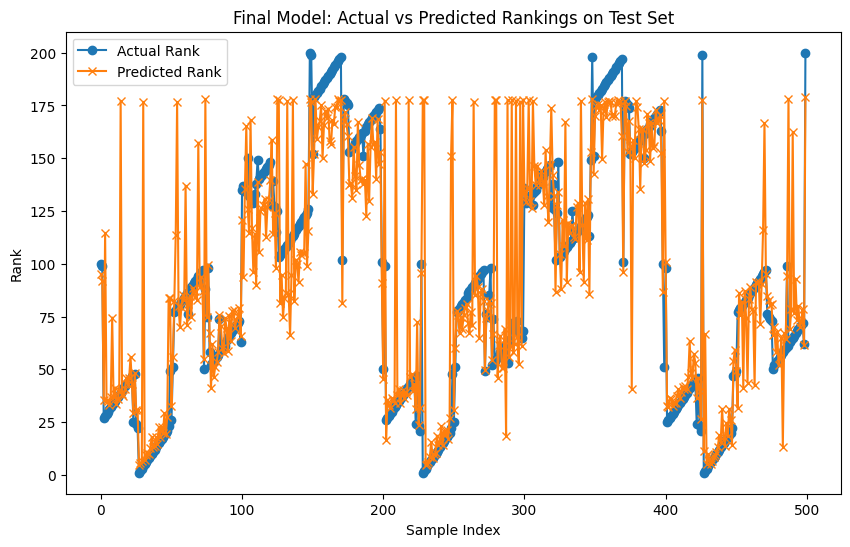

In [16]:
import matplotlib.pyplot as plt

# Make predictions on the test set
test_predictions = model.predict(input_data[-500:])  # Replace 'X' with your test data 'test_X'


# Compare predicted and actual rankings on the test set
plt.figure(figsize=(10, 6))
plt.plot(y[-500:].to_numpy().reshape(-1, 1), label='Actual Rank', marker='o')  # Actual rankings (first 100 data points)
plt.plot(test_predictions, label='Predicted Rank', marker='x')  # Predicted rankings (first 100 data points)
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Final Model: Actual vs Predicted Rankings on Test Set')
plt.legend()
plt.show()

# 5. 모델 성능 및 평가

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test.reshape(-1, 1), test_predictions)
mae = mean_absolute_error(y_test.reshape(-1, 1), test_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 353.595573891989
Root Mean Squared Error (RMSE): 18.804137148297684
Mean Absolute Error (MAE): 9.3365430727005
